# Online Sales Analysis with Python
### Fatimat Atanda & Tommy Poole
MSAAI Group Project 1 - Fall 2024

In [2]:
import pandas as pd # for data science
import numpy as np  # linear algebra library
import matplotlib.pyplot as plt # plotting library
import datetime as dt
# import stats functions
from scipy import stats
# normal continuous random variable
from scipy.stats import norm 
from statsmodels.tsa.holtwinters import ExponentialSmoothing # for future forcasting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # for clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # for hierarchy clustering
from sklearn.metrics import mean_absolute_error, r2_score
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
# Read in Data file using the URL
retail_data = pd.read_csv('https://archive.ics.uci.edu/static/public/352/data.csv') 

data = pd.DataFrame(retail_data)

# Displaying all the columns (variables) from the dataset
variables = data.columns.tolist()
print(variables)

# Clean the data by removing missing values from each column for analysis accuracy
df = data.dropna(subset=variables)

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [4]:
# Descriptive Statistics
# Display the first few rows of the DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# View last few rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
# Check datatypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
# Data Cleaning
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add a 'TotalSales' column: Quantity * UnitPrice
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Extract only United Kingdom retail data for analysis
uk_data = df[df['Country'] == 'United Kingdom']
uk_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,70.8


In [8]:
# Data Analysis
# Sales Analysis
# Dtermine the total Sales
total_sales = uk_data['TotalSales'].sum()
print(f"Total Sales in UK: £{total_sales:.2f}")

# Average Sales per Transaction by invoiceNo
average_sales = uk_data.groupby('InvoiceNo')['TotalSales'].mean().mean()
print(f"Average Sales per Transaction: £{average_sales:.2f}")

Total Sales in UK: £6767873.39
Average Sales per Transaction: £34.16


Top 10 Products by Total Sales:
Description
REGENCY CAKESTAND 3 TIER              103122.85
WHITE HANGING HEART T-LIGHT HOLDER     88313.95
JUMBO BAG RED RETROSPOT                75416.67
PARTY BUNTING                          61952.58
ASSORTED COLOUR BIRD ORNAMENT          52314.87
CHILLI LIGHTS                          45155.61
PICNIC BASKET WICKER 60 PIECES         39619.50
PAPER CHAIN KIT 50'S CHRISTMAS         39596.73
BLACK RECORD COVER FRAME               37799.42
WOOD BLACK BOARD ANT WHITE FINISH      33408.76
Name: TotalSales, dtype: float64


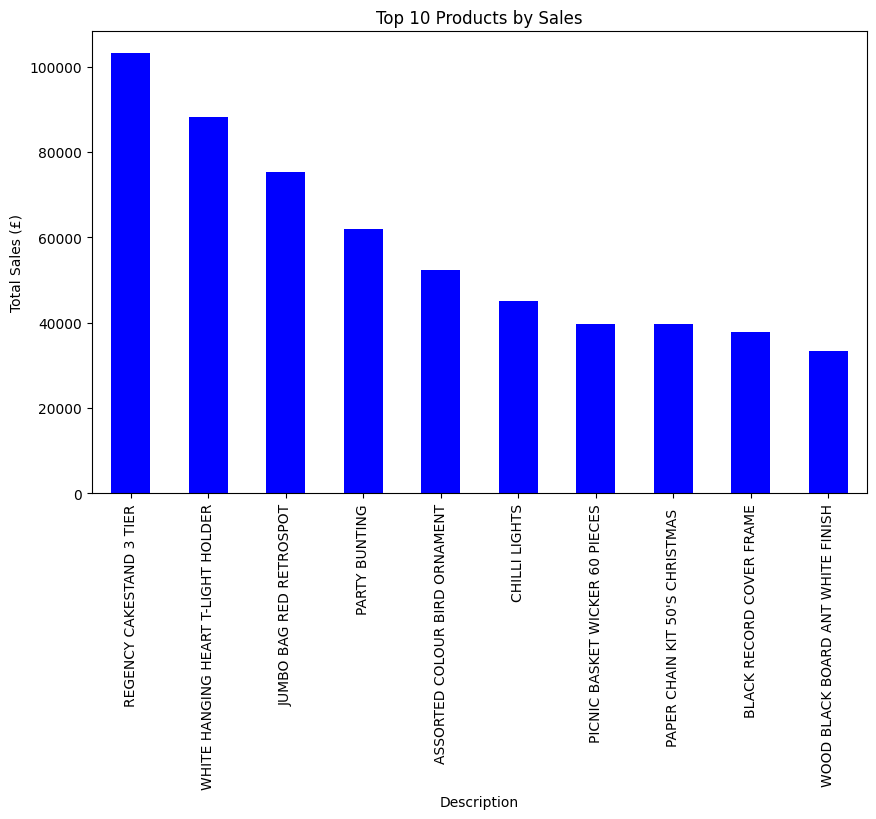

In [9]:
# determine the top 10 Products by Sales
top_products = uk_data.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Total Sales:")
print(top_products)

# Distribution of top 10 product sales
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='blue')
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=90)
plt.show()

         TotalSales ForecastedSales
2010-12  483799.740             NaN
2011-01  351981.280             NaN
2011-02  348853.630             NaN
2011-03  456917.870             NaN
2011-04  376744.411             NaN
2011-05  525573.350             NaN
2011-06  472509.250             NaN
2011-07  461147.601             NaN
2011-08  477008.410             NaN
2011-09  776529.842             NaN
2011-10  782777.880             NaN
2011-11  956109.660             NaN
2011-12  297920.470             NaN
2012-01         NaN       660994.93
2012-02         NaN       676656.92
2012-03         NaN       906173.73
2012-04         NaN       873185.58
2012-05         NaN      1028587.85
2012-06         NaN       880533.20
2012-07         NaN       834841.36
2012-08         NaN       850503.35
2012-09         NaN      1080020.16
2012-10         NaN      1047032.01
2012-11         NaN      1202434.27
2012-12         NaN      1054379.63


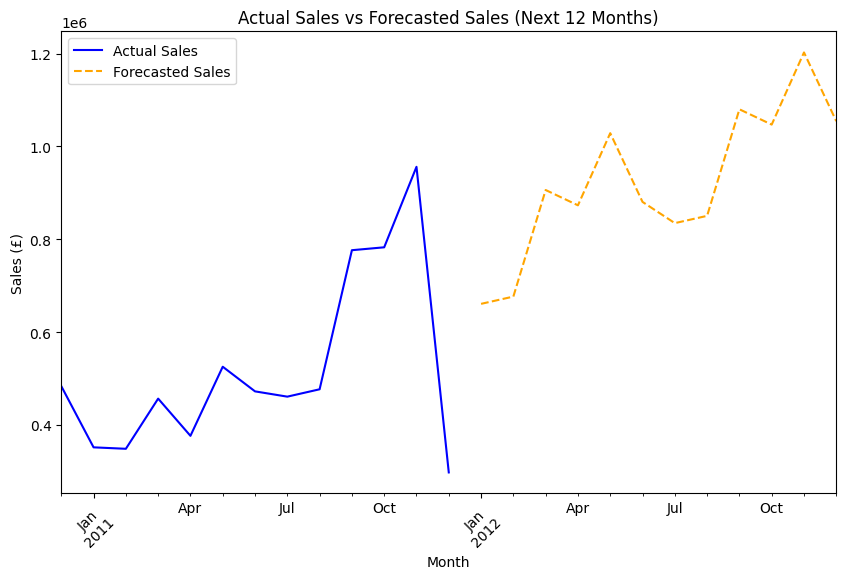

In [17]:
# Time-Series Analysis
# Total sales by Date (day) ignoring time 
# sales_by_date = uk_data.groupby(uk_data['InvoiceDate'].dt.date)['TotalSales'].sum()

# Group sales by month
monthly_sales = uk_data.groupby(uk_data['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()
# Fit a Time-Series Model (Holt-Winters Exponential Smoothing)
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=6)
fitted_model = model.fit()

# Make Predictions - Forecast sales for the next 12 months
forecast = fitted_model.forecast(12)

# Create a DataFrame for the forecasted period
forecast_df = pd.DataFrame(forecast, columns=['ForecastedSales'])
forecast_df = forecast_df['ForecastedSales'].apply(lambda x: f"{x:.2f}")
# Combine actual and forecasted data into one table
combined_sales = pd.concat([monthly_sales, forecast_df], axis=1)

# Display the combined table
print(combined_sales)

# Plot Actual Sales and Forecasted Sales
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', label='Actual Sales', color='blue')
forecast.plot(kind='line', label='Forecasted Sales', color='orange', linestyle='--')
plt.title('Actual Sales vs Forecasted Sales (Next 12 Months)')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print the forecasted values
#print(forecast)


In [11]:
## RFM Analysis

# Today is set as the maximum InvoiceDate + 1 day to calculate recency
today = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate RFM Metrics for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalSales': 'sum'  # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Assign RFM scores by ranking customers
rfm['R_rank'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  # Quartiles for recency
rfm['F_rank'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])  # Quartiles for frequency
rfm['M_rank'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])  # Quartiles for monetary

# Create an overall RFM score
rfm['RFM_Score'] = rfm['R_rank'].astype(str) + rfm['F_rank'].astype(str) + rfm['M_rank'].astype(str)

# Analyze the segments based on RFM scores to determine top customers, potential loyalists, etc.
rfm['Segment'] = pd.cut(rfm['RFM_Score'].astype(int), bins=[0, 123, 234, 344, 444], labels=['Low Value', 'Potential Value', 'Valuable', 'High Value'])

# Show the RFM table and segments
rfm.head()


,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,Low Value
12347.0,2,182,4310.00,4,4,4,444,High Value
12348.0,75,31,1797.24,2,2,4,224,Potential Value
12349.0,19,73,1757.55,3,3,4,334,Valuable
12350.0,310,17,334.40,1,1,2,112,Low Value


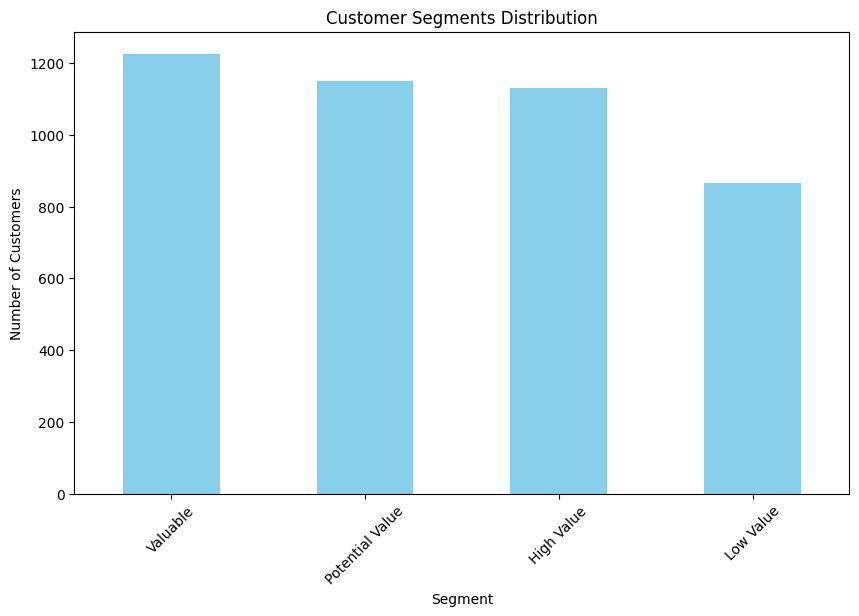

In [12]:
# Count the number of customers in each segment
segment_counts = rfm['Segment'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10,6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

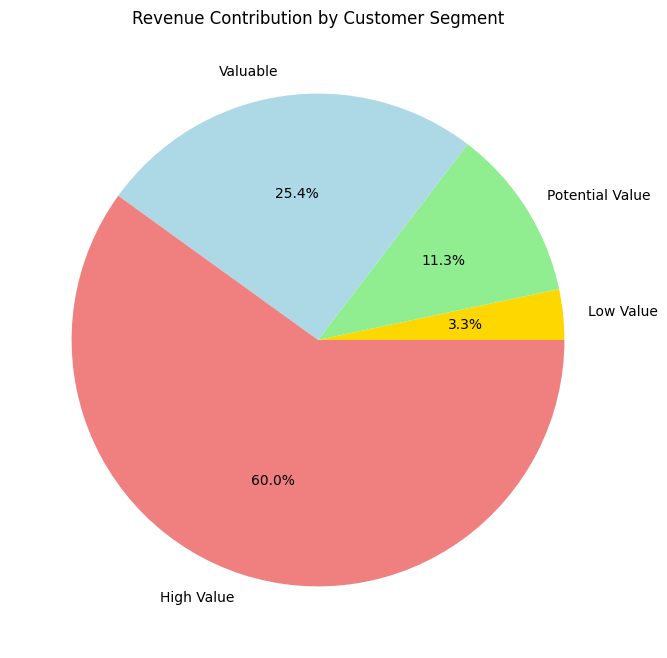

In [13]:
# Calculate the total revenue contributed by each segment
segment_revenue = rfm.groupby('Segment')['Monetary'].sum()

# Plot a pie chart
plt.figure(figsize=(8,8))
segment_revenue.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightgreen', 'lightblue', 'lightcoral'])
plt.title('Revenue Contribution by Customer Segment')
plt.ylabel('')  # Hide y-label
plt.show()


In [14]:
# Sort customers by RFM score to identify top customers
top_customers = rfm.sort_values(by='RFM_Score', ascending=False).head(10)

# Display top 10 customers
top_customers

,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score,Segment
CustomerID,,,,,,,,
13854.0,9,114,8025.02,4,4,4,444,High Value
16525.0,2,200,11895.57,4,4,4,444,High Value
14243.0,9,148,2535.88,4,4,4,444,High Value
16458.0,3,202,3482.74,4,4,4,444,High Value
12901.0,9,125,16293.10,4,4,4,444,High Value
17677.0,2,321,16219.22,4,4,4,444,High Value
16474.0,7,368,1811.47,4,4,4,444,High Value
14217.0,2,107,1925.36,4,4,4,444,High Value
14215.0,12,109,1777.92,4,4,4,444,High Value


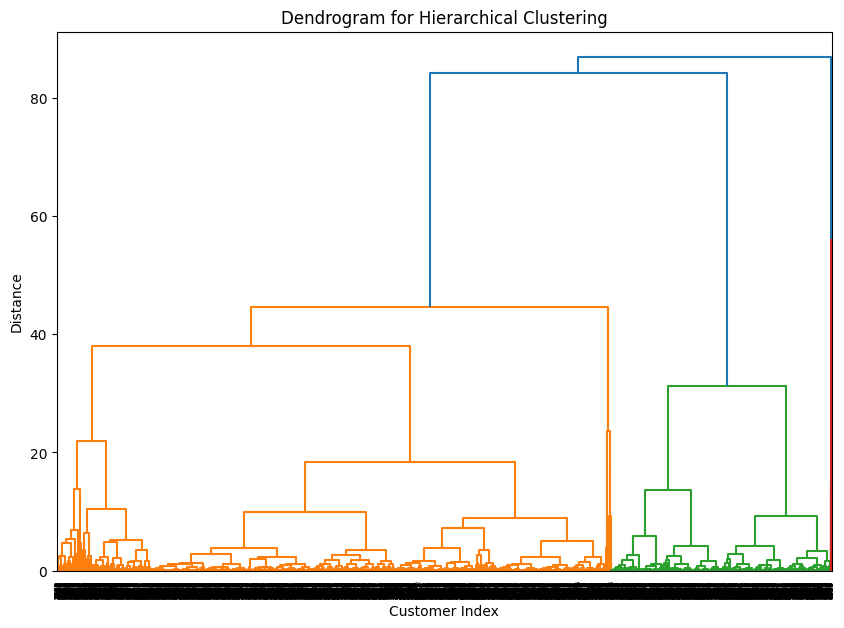

            Recency    Frequency       Monetary  Customer Count
Cluster                                                        
1          3.666667   956.333333  241136.560000               3
2          2.000000  5914.000000   64776.602500               4
3        169.586319    33.923453     593.782427             614
4        296.179200    24.744000     395.939474             625
5          8.450000   289.850000   39145.576500              20
6          6.428571  1720.571429   72088.068571               7
7         40.687451    59.877241     993.429000            2566
8         16.688442   233.520101    4977.057236             398
9         14.170370   589.503704    6577.552148             135


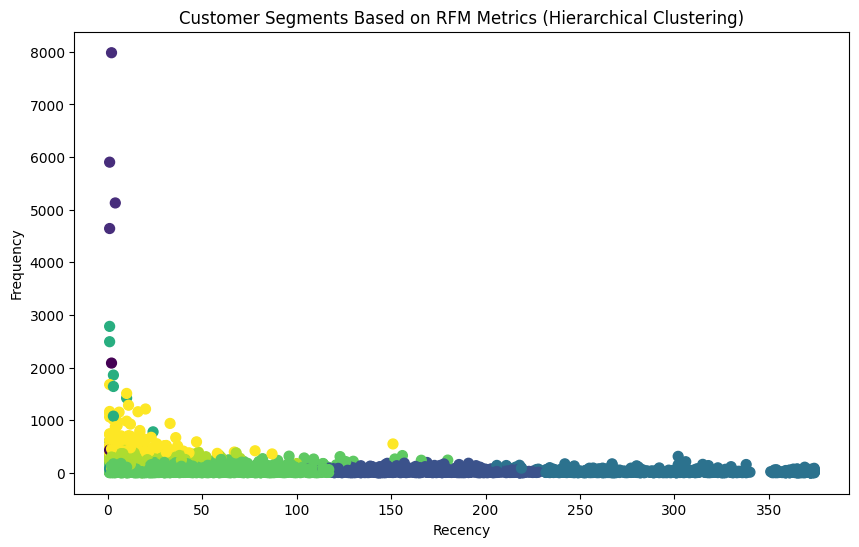

In [15]:
## Using clustering model to determine the RFM of customer groups
rfm = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
# Step 3: Perform hierarchical clustering using the 'ward' method (or 'complete', 'average')
linked = linkage(rfm_scaled, method='ward')

# Plot the dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# Choose the number of clusters by cutting the dendrogram at an appropriate level
distance_threshold = 20  # adjust this based dendrogram. the higher the number the lesser the number of clusters
rfm['Cluster'] = fcluster(linked, distance_threshold, criterion='distance')


# Step 6: Analyze the clusters
# Grouping customers by clusters and calculating the average RFM values for each cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Customer Count'})

# Display the cluster summary
print(cluster_summary)

# Step 7: Visualize the clusters (optional: Recency vs. Frequency)
plt.figure(figsize=(10, 6))
plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Cluster'], cmap='viridis', marker='o', s=50)
plt.title('Customer Segments Based on RFM Metrics (Hierarchical Clustering)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()